# Tarea 4 Física computacional: Cálculo

La tercera tarea la omití (era sobre bases de datos). 



## Diferenciales numéricas y cálculo simbólico:

1 **Fácil**. Escribe el desarrollo de Taylor de la función $f$ al rededor de $x$ hasta orden 4 para variaciones $\Delta x$, $1.5 \Delta x$, $2 \Delta x$, $2.5 \Delta x$ y $3 \Delta x$. Multiplica cada desarrollo por un coeficiente diferente $A_1$, $A_{1.5}$, $A_2$, $A_{2.5}$ y $A_3$ y suma los 5 desarrollos. Haciendo 0 los coeficientes de que multiplican $f(x)$, $f'(x)$, $f''(x)$ y $f^{(3)}(x)$ y 1 el que multiplica a $f^{(4)}(x)$, obtén un sistema de ecuaciones lineales para los valores de $A_1$, $A_{1.5}$, $A_2$, $A_{2.5}$ y $A_3$. Finalmente resolviendo ese sistema de ecuaciones obtén una fórmula para $f^{(4)}(x)$ (usa fracciones como 3//5 en vez de 1.5). Prueba tu fórmula con sin(x). ¿Qué tal funciona? Grafica sin(x) y su cuarta diferencial. 

In [105]:
using Plots, LinearAlgebra, ForwardDiff, BenchmarkTools, LaTeXStrings

In [106]:
function coef(n)
    b = [0//1 for i in 1:n]
    b[n] = 1//1
    R1 = transpose([1 for i in 1:n])
    R2 = transpose([i for i in 2:n+1])
    R3 = transpose([i^2 for i in 2:n+1])
    R4 = transpose([i^3 for i in 2:n+1])
    R5 = transpose([i^4 for i in 2:n+1])
    A = [R1;R2;R3;R4;R5]
    coeficientes = A^-1 * b 
end 
n = 5
coeficientes = coef(n)
d4(f, x; Δt = 0.000001) = sum([coeficientes[i+1]*f(x+Δt*(1+i*(1/2))) for i in 0:n-1])*factorial(4)*2^4/(Δt^4)

d4 (generic function with 1 method)

In [107]:
using Plots, LaTeXStrings

In [108]:
f₁(x) = sin(x)
x = 0:0.001:2π
y =[]
for xi in x
    push!(y,d4(f₁,xi,Δt = big(1e-2)))
end

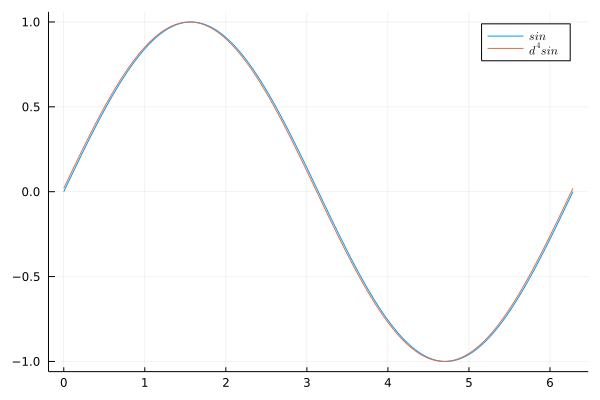

In [109]:
plot(x, f₁.(x), label = L"sin")
plot!(x, y, label = L"d^4 sin")

2. **Dificultad media**. El proceso anterior lo puedes generalizar dados los coeficientes que multiplican a $\Delta x$. Haz una función que tenga como argumentos esos coeficientes, el grado de derivada que se quiere calcular y arroje los valores de las constantes $A_r$. Haz además una función que dadas las constantes $A_r$ y los coeficientes que multiplican a $\Delta x$, genere una función que calcule la correspondiente derivada. 

Nota: En este ejercicio NO puedes usar SymPy! 

In [110]:
function Derivada(f,x,Δx,K,n)
    L = length(K)
    ##### n+1 <= L
    b = [0//1 for i in 1:L]
    b[n+1] = factorial(n)//1
    A = [K[i]^(j-1) for j in 1:L,i in 1:L]
    coeficientes = A^-1 * b 
    return (sum([coeficientes[i]*f(x+Δx*K[i]) for i in 1:L])/(Δx^(n)))
end

Derivada (generic function with 1 method)

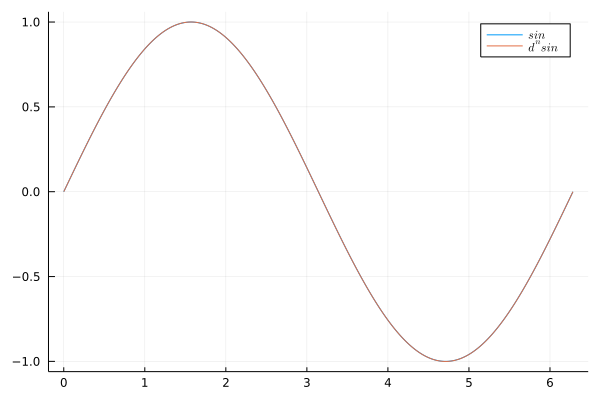

In [111]:
f₁(x) = sin(x)
x = 0:0.001:2π
Δt = 0.01
K = [1,3//2,2,5//2,3,7//2] #coeficientes
n=4 #grado de la derivada
y =[]
for xi in x
    push!(y,Derivada(f₁,xi,Δt,K,n))
end
plot(x, f₁.(x), label = L"sin")
plot!(x, y, label = L"d^n sin")

3. **Dificultad media**. Revisa cómo varía el error en la **primera** diferencial numérica (usando la versión simple del curso dos veces y un par más que produzcas con tu función del ejercicio 2) de las funciones $sin(x)$, $x^2$, $1/x$ y $tan(1/x)$ para varios valores de $x$ y como función de $\Delta x$ (lo que en el video puse como $\Delta t$). Para esto primero obtén analíticamente las derivadas de estas funciones (llamémosle genéricamente $f$ a la función, $f'$ a su derivada y $\frac{\Delta f}{\Delta x}$ a su diferencial numérica). Grafica $\frac{\Delta f(x)}{\Delta x}- f'(x)$ contra $\Delta x$. Conviene graficar en escala logarítimica, así que los valores de $\Delta x$ deben ir variando exponencialmente, por ejemplo, cada nuevo valor de $\Delta x$ que sea $\Delta x_n = 2 \Delta x_{n-1}$ comenzando con $\Delta x_0 = 10^{-10}$. Discute un **poco** tus resultados.

Nota: Recuerda que en $\Delta x$ la derivada numérica tiende a NaN. 

Nota2: Usa SymPy para obtener las derivadas simbólicas (analíticamente) de las funciones. 

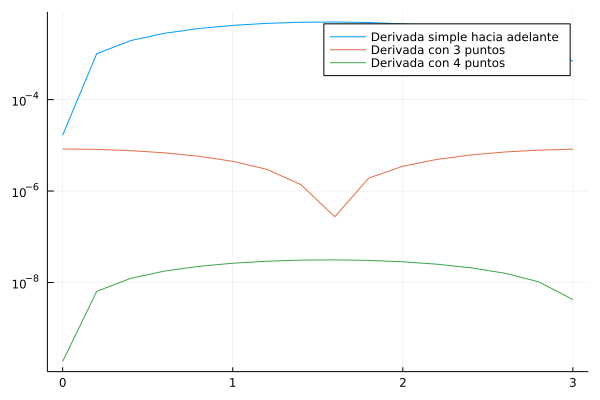

In [112]:
f₁(x) = sin(x)
df₁(x) = cos(x)

X = 0:.2:pi
#### Aproximación simple (dos puntos, hacia adelante)
dn0(f ,x , Δt) = (f(x+Δt)-f(x))/Δt
Y0 = []
#### Aproximación con 3 puntos
n = 1
K1 = [0,1//2,1]
Y1 = []
### Aproximación con 4 puntos
K2 = [0,1//2,1,3//2]
Y2 = []

### Aproximación con 5 puntos
K3 = [0,1//2,1,3//2,2]
Y3 = []

δx = big(0.01)

for xi in X
    push!(Y0,abs(dn0(f₁,xi,δx)-df₁(xi)))
    push!(Y1,abs(Derivada(f₁,xi,δx,K1,n)-df₁(xi)))
    push!(Y2,abs(Derivada(f₁,xi,δx,K2,n)-df₁(xi)))
    push!(Y3,abs(Derivada(f₁,xi,δx,K3,n)-df₁(xi)))
end
plot(X,Y0,label="Derivada simple hacia adelante", yscale=:log10)
plot!(X,Y1,label = "Derivada con 3 puntos", yscale=:log10)
plot!(X,Y2, label = "Derivada con 4 puntos", yscale=:log10)

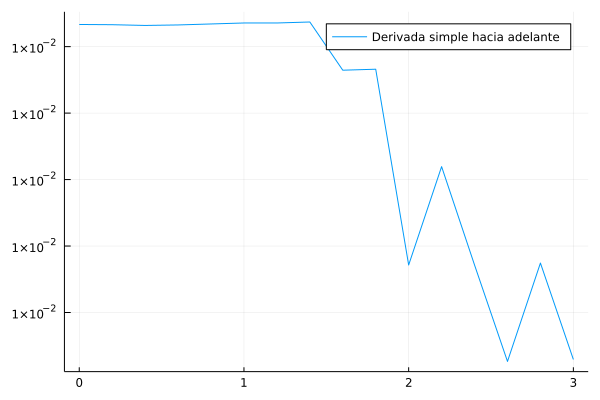

In [113]:
f₁(x) = x^2
df₁(x) = 2*x

X = 0:0.2:pi
#### Aproximación simple (dos puntos, hacia adelante)
dn0(f ,x , Δt) = (f(x+Δt)-f(x))/Δt
Y0 = []
#### Aproximación con 3 puntos
n = 1
K1 = [0,1//2,1]
Y1 = []
### Aproximación con 4 puntos
K2 = [0,1//2,1,3//2]
Y2 = []

### Aproximación con 5 puntos
K3 = [0,1//2,1,3//2,2]
Y3 = []

δx = 0.01

for xi in X
    push!(Y0,abs(dn0(f₁,xi,δx)-df₁(xi)))
    push!(Y1,abs(Derivada(f₁,xi,δx,K1,n)-df₁(xi)))
    push!(Y2,abs(Derivada(f₁,xi,δx,K2,n)-df₁(xi)))
    push!(Y3,abs(Derivada(f₁,xi,δx,K3,n)-df₁(xi)))
end
plot(X,Y0,label="Derivada simple hacia adelante")


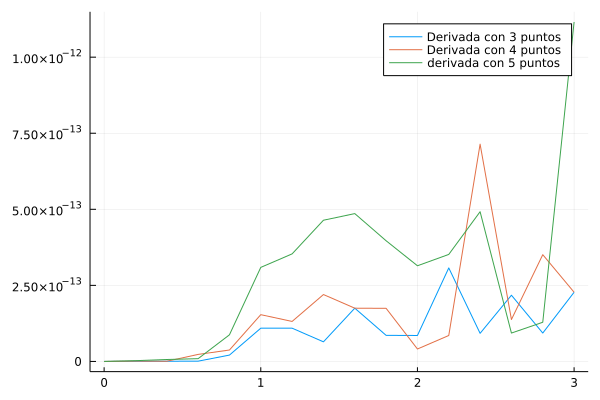

In [114]:
plot(X,Y1,label = "Derivada con 3 puntos")
plot!(X,Y2, label = "Derivada con 4 puntos")
plot!(X,Y3,label = "derivada con 5 puntos")

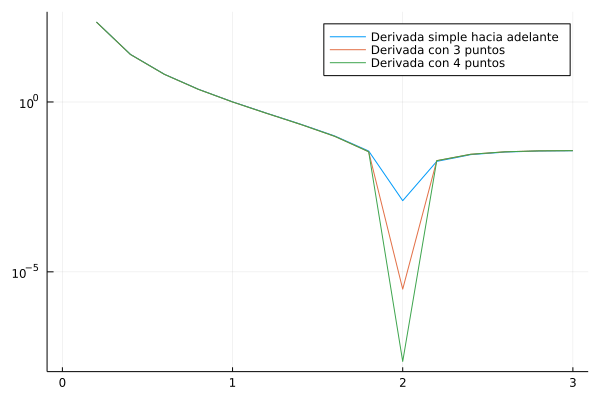

In [115]:
f₁(x) = 1/x
df₁(x) = -2/x^3

X = 0:.2:pi
#### Aproximación simple (dos puntos, hacia adelante)
dn0(f ,x , Δt) = (f(x+Δt)-f(x))/Δt
Y0 = []
#### Aproximación con 3 puntos
n = 1
K1 = [0,1//2,1]
Y1 = []
### Aproximación con 4 puntos
K2 = [0,1//2,1,3//2]
Y2 = []

### Aproximación con 5 puntos
K3 = [0,1//2,1,3//2,2]
Y3 = []

δx = 0.01

for xi in X
    push!(Y0,abs(dn0(f₁,xi,δx)-df₁(xi)))
    push!(Y1,abs(Derivada(f₁,xi,δx,K1,n)-df₁(xi)))
    push!(Y2,abs(Derivada(f₁,xi,δx,K2,n)-df₁(xi)))
    push!(Y3,abs(Derivada(f₁,xi,δx,K3,n)-df₁(xi)))
end
plot(X,Y0,label="Derivada simple hacia adelante", yscale=:log10)
plot!(X,Y1,label = "Derivada con 3 puntos", yscale=:log10)
plot!(X,Y2, label = "Derivada con 4 puntos", yscale=:log10)

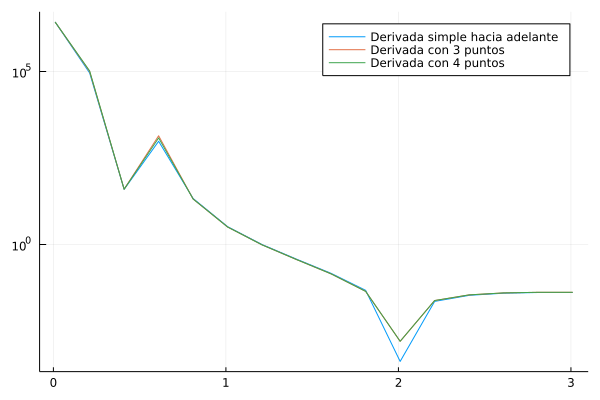

In [116]:
f₁(x) = tan(1/x)
df₁(x) = (sec(1/x))^2*(-2/x^3)

X = 0.01:.2:pi
#### Aproximación simple (dos puntos, hacia adelante)
dn0(f ,x , Δt) = (f(x+Δt)-f(x))/Δt
Y0 = []
#### Aproximación con 3 puntos
n = 1
K1 = [0,1//2,1]
Y1 = []
### Aproximación con 4 puntos
K2 = [0,1//2,1,3//2]
Y2 = []

### Aproximación con 5 puntos
K3 = [0,1//2,1,3//2,2]
Y3 = []

δx = 0.01

for xi in X
    push!(Y0,abs(dn0(f₁,xi,δx)-df₁(xi)))
    push!(Y1,abs(Derivada(f₁,xi,δx,K1,n)-df₁(xi)))
    push!(Y2,abs(Derivada(f₁,xi,δx,K2,n)-df₁(xi)))
    push!(Y3,abs(Derivada(f₁,xi,δx,K3,n)-df₁(xi)))
end
plot(X,Y0,label="Derivada simple hacia adelante", yscale=:log10)
plot!(X,Y1,label = "Derivada con 3 puntos", yscale=:log10)
plot!(X,Y2, label = "Derivada con 4 puntos", yscale=:log10)

4. **Dificultad media**. Este ejercicio es similar al anterior. Elige una función no polinomial que se pueda derivar al menos 4 veces sin que su derivada en todo punto sea 0. Revisa cómo varía el error en la primera deferencial numérica y compara con cómo varía al obtener la segunda, tercera y hasta cuarta diferencial, usando 2 métodos, (i) usando 4 veces la diferencial simple. (i) obteniendo con la función del ejercicio 2, la funciones para calcular la primera, segunda, tercera y cuarta diferencial numérica. 

Nota: Usa SymPy para obtener las derivadas simbólicas (analíticamente) de las funciones. Así puedes poner funciones no tan simples. 

Nota2: (no cuenta) Prueba también usando BigFloats en el valor que evalues la derivada. En particular prueba como varía para valores pequeños (x = 0.01) en el caso de la segunda derivada de 1/x y de tan(1/x). 

In [117]:
using SymPy;
@vars x

(x,)

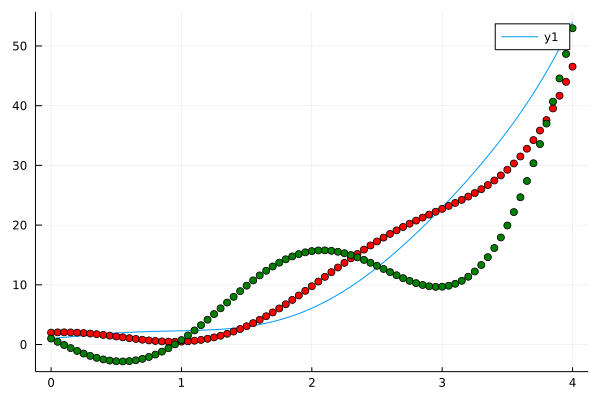

In [118]:
f4(x)=exp(x) + x*cos(2*x)
d1f4(x)=diff(f4(x),x)
d2f4(x)=diff(d1f4(x),x)
d3f4(x)=diff(d2f4(x),x)
d4f4(x)=diff(d3f4(x),x)

Z = 0:0.05:4
plot(Z,f4.(Z))
for z in Z
    scatter!([z],[N(d1f4(x)(z))],label="",color=:red,show=:ijulia)
    scatter!([z],[N(d2f4(x)(z))],label="",color=:green,show=:ijulia)
end


In [119]:
dn0(f ,x ; Δt=0.001) = (f(x+Δt)-f(x))/Δt
df1(x) = dn0(f4,x)
df2(x) = dn0(df1,x)
df3(x) = dn0(df2,x)
df4(x) = dn0(df3,x)

function Derivada(f,x,K,n;Δx = 0.001)
    L = length(K)
    ##### n+1 <= L
    b = [0//1 for i in 1:L]
    b[n+1] = factorial(n)//1
    A = [K[i]^(j-1) for j in 1:L,i in 1:L]
    coeficientes = A^-1 * b 
    return (sum([coeficientes[i]*f(x+Δx*K[i]) for i in 1:L])/(Δx^(n)))
end

E11 = []
E21 = []
E12 = []
E22 = []
E13 = []
E23 = []
E14 = []
E24 = []

Z = 0:0.05:4
K = [0.0,1//2,1,3//2,2]

for z in Z
    push!(E11,abs(df1(z) - N(d1f4(x)(z))))
    push!(E21,abs(Derivada(f4,z,K,1) - N(d1f4(x)(z))))
    
    push!(E12,abs(df2(z) - N(d2f4(x)(z))))
    push!(E22,abs(Derivada(f4,z,K,2) - N(d2f4(x)(z))))

    push!(E13,abs(df3(z) - N(d3f4(x)(z))))
    push!(E23,abs(Derivada(f4,z,K,3) - N(d3f4(x)(z))))

    push!(E14,abs(df4(z) - N(d4f4(x)(z))))
    push!(E24,abs(Derivada(f4,z,K,4) - N(d4f4(x)(z))))  
end

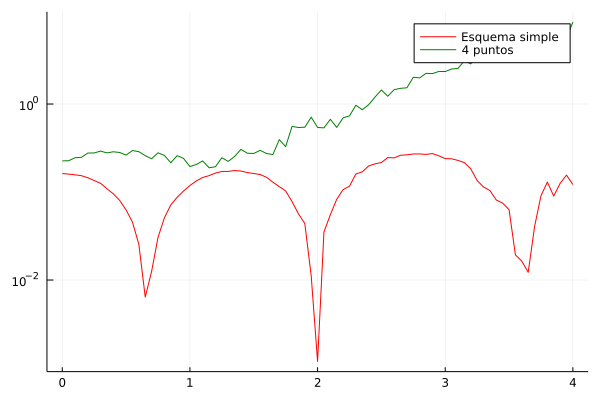

In [120]:
#### Errores en el cálculo de la 1ra derivada por ambos esquemas
#plot(Z,E11,label="",color=:red,yscale=:log10)#,show=:ijulia)
#plot!(Z,E21,label="",color=:green)#,show=:ijulia)

#### Errores en el cálculo de la 2da derivada por ambos esquemas
#plot(Z,E12,label="",color=:red,yscale=:log10)#,show=:ijulia)
#plot!(Z,E22,label="",color=:green)#,show=:ijulia)

#### Errores en el cálculo de la 3ra derivada por ambos esquemas
#plot(Z,E13,label="",color=:red,yscale=:log10)#,show=:ijulia)
#plot!(Z,E23,label="",color=:green)#,show=:ijulia)

#### Errores en el cálculo de la 4ta derivada por ambos esquemas
plot(Z,E14,color=:red,yscale=:log10, label="Esquema simple")#,show=:ijulia)
plot!(Z,E24,color=:green,label="4 puntos")#,show=:ijulia)

5. **Fácil**. Utiliza SymPy para hacer varias integrales indefinidas. Aplícalo a alguna integral que sepas que no se puede obtener analíticamente. ¿Qué sucede en ese caso? vuelve esa integral definida. ¿Qué sucede ahora? Prueba usar la función N() sobre esta integral definida. ¿Qué sucede? ¿Hay alguna forma de obtener el valor numérico?

In [121]:
using SymPy

In [122]:
@vars x

(x,)

In [123]:
integrate(cos(x), x) 

sin(x)

In [124]:
integrate(x^2,x)

 3
x 
──
3 

In [125]:
integrate(exp(-x^2),x)

√π⋅erf(x)
─────────
    2    

notemos que al usar sympy la integral de $e^{-x^2}$, nos devuelve en terminos de $erf(x)$

In [126]:
integrate(exp(-x^2),(x,0,2pi))

0.5⋅√π

In [127]:
N(integrate(exp(-x^2),(x,0,2pi)))

0.8862269254527580136490837416705725913987747280611935641069038949264556422955125

notemos que el resultado se convitio en un numero y no en un simbolo

6. **Fácil**. Compara el tiempo que tarda en hacer una derivada de orden 5 numéricamente (con 2 métodos, diferenciando 5 veces la función y usando una función que obtenga la quinta diferencial en un solo paso) y simbólicamente. Prueba con diferentes funciones (juega un ratito con SymPy y Benchmarktools). ¿Hay algo que haga más lenta la derivación simbólica?  

In [128]:
using BenchmarkTools

derivada de orden 5 numericamente: diferenciando 5 veces la funcion

In [129]:
d(f, t; Δt = big(0.003)) = (f(t+Δt)-f(t))/Δt 

d (generic function with 1 method)

In [130]:
f1(x)=sin(x)
f2(x)=d(f1,x) #cos
f3(x)=d(f2,x) #-sin
f4(x)=d(f3,x) #-cos
f5(x)=d(f4,x) #sin
f6(x)=d(f5,x) #cos

f6 (generic function with 1 method)

In [131]:
f6(1)

0.5339824476320525046374749591193881481157695628010293493343361057363484096440056

In [132]:
# comprobando que el resultado coincida
cos(1)

0.5403023058681398

In [133]:
t1 = @belapsed f6(1)
t1

0.0001179

In [134]:
f₁(x) = sin(x)
x = 1
Δt = big(1e-6)
K = [1,3//2,2,5//2,3,7//2]
n=5
Derivada(f₁,x,Δt,K,n)

0.5403004125570281203731468903069367198340762645086420444508805370210910696423125

In [135]:
t2= @belapsed Derivada(f₁,1,Δt,K,n)
t2

6.2799e-5

Ahora mediante la derivacion simbolica,usando sympy, derivamos:

In [136]:
N(diff(f₁(z), z , 5)(1))

0.5403023058681398

In [137]:
N(diff(sin(z),z)(1))

0.5403023058681398

In [138]:
t3= @belapsed N(diff(sin(z), z,5)(1))

0.0010079

## Diferenciación automática

7. **Fácil**. Copia del video (o notebook), el objeto de número dual y los métodos de +, -, /, ^, sin y cos para números duales. Prueba que con esto haga la diferencial automática de tan(x). Además agrega los métodos necesarios para exp. Prueba que con estos métodos haga la derivación automática de $exp(tan(x))+tan(x)^2$ correctamente. 

In [139]:
struct D{T1 <: Number, T2 <: Number} <: Number
    valor::T1
    derivada::T2
end

In [140]:
# definimos cómo operar con los el número dual D, +,-,*,/,^
import Base.+, Base.-, Base.*, Base./, Base.^
+(a::D, b::D) = D(a.valor + b.valor, a.derivada + b.derivada)
+(a::D, b::Number) = D(a.valor + b, a.derivada)
+(b::Number, a::D) = D(a.valor + b, a.derivada)
-(a::D, b::D) = D(a.valor - b.valor, a.derivada - b.derivada)
-(a::D, b::Number) = D(a.valor - b, a.derivada)
-(b::Number, a::D) = D(-a.valor + b, -a.derivada)
*(a::D, b::D) = D(a.valor*b.valor, a.derivada*b.valor+b.derivada*a.valor)
*(a::D, b::Number) = D(b*a.valor,b*a.derivada)
*(b::Number, a::D) = D(b*a.valor,b*a.derivada)
/(a::D, b::D) = D(a.valor/b.valor,(a.derivada*b.valor-a.valor*b.derivada)/b.valor^2)
/(a::D, b::Number) = D(a.valor/b,a.derivada/b)
/(b::Number, a::D) = D(b/a.valor,-b*a.derivada/a.valor^2)
^(a::D, b::Real) = D(a.valor^b, b*a.valor^(b-1)*a.derivada)
^(a::D, b::Int) = D(a.valor^b, b*a.valor^(b-1)*a.derivada)

^ (generic function with 96 methods)

In [141]:
import Base.sin, Base.cos, Base.exp, Base.tan, Base.sec
sin(a::D) = D(sin(a.valor), cos(a.valor)*a.derivada)
cos(a::D) = D(cos(a.valor), (-1)*sin(a.valor)*a.derivada)
exp(a::D) = D(exp(a.valor),exp(a.valor)*a.derivada)
tan(a::D) = D(tan(a.valor),(sec(a.valor))^2*a.derivada)
sec(a::D) = D(sec(a.valor),sec(a.valor)*tan(a.valor)*a.derivada)

sec (generic function with 8 methods)

In [142]:
derivadas(f, x) = f(D(x,one(x))).derivada


derivadas (generic function with 1 method)

In [143]:
f(x)=sin(x)/cos(x)
derivadas.(f,0)

1.0

In [144]:
f1(x)=tan(x)
derivadas.(f1,0)

1.0

In [145]:
f2(x)=exp(tan(x))+(tan(x))^2
derivadas.(f2,1)

26.92908761012717

8. **Fácil**. Números duales: Pensemos en la multiplicación $(a+\epsilon b)(c+ \epsilon d) = ac+\epsilon (bc+ad) + \epsilon^2 bd$. Si $\epsilon$ es pequeño, podemos despreciar su cadrado y quedarnos con $(a+\epsilon b)(c+ \epsilon d) \approx ac+\epsilon (bc+ad)$. Con esta regla podemos definir los números duales. Igual que en los complejos tenemos el número $i$ que nos sirve para definir la parte imaginaria, en los duales tenemos el número $\epsilon$ que nos sirve para definir la diferencial. Muestra que esta regla multiplicativa se puede obtener si representamos los números duales como las matrices y la multiplicación habitual de matrices: 
$$D(a,b) = \begin{pmatrix}
a & b \\
0 & a
\end{pmatrix}$$

usa esto para hacer una nueva función de derivada automática. Prueba que ambas funciones obtengan los mismos resultados sobre diferentes funciones y mide sus tiempos de cómputo usando BenchmarkTools. ¿Qué versión es más rápida?


In [146]:
D2(a,b) = [a b; 0 a]; #Definimos la matriz del número Dual

#Definimos las reglas de operación entre matrices D2
import Base.+, Base.-
+(A::Array{Float64,2}, B::Real) = A + D2(B,0)
+(A::Array{Int64,2}, B::Real) = A + D2(B,0)
-(A::Array{Float64,2}, B::Real) = A - D2(B,0)
-(A::Array{Int64,2}, B::Real) = A - D2(B,0)

#Definimos las reglas de funciones trigonométricas con D2
import Base.sin, Base.cos
sin(A::Array{Float64,2}) = D2(sin(A[1,1]), cos(A[1,1])*A[1,2])
sin(A::Array{Int64,2}) = D2(sin(A[1,1]), cos(A[1,1])*A[1,2])
cos(A::Array{Int64,2}) = D2(cos(A[1,1]), -sin(A[1,1])*A[1,2])
cos(A::Array{Float64,2}) = D2(cos(A[1,1]), -sin(A[1,1])*A[1,2])

cos (generic function with 18 methods)

In [147]:
#Derivada automática de la identidad f(x) = x
function derivada2(f,x)
    return f(D2(x, one(x)))[1,2]
end

derivada2 (generic function with 1 method)

In [148]:
f(x) = 3x^2 - 3x +1
@btime derivada2(f, pi/12)

  369.123 ns (14 allocations: 1.00 KiB)


-1.4292036732051034

In [149]:
@btime derivadas(f, pi/12)

  0.001 ns (0 allocations: 0 bytes)


-1.4292036732051034

9. **Muy difícil**. (reto opcional, es decir, no cuenta (y no los asesoraré al respecto), pero es una forma de medir qué tan buenos son programando. Si lo logran, van muy bien). Haz una función que diferencie automáticamente $n$ veces, pero que incluya como casos especiales la derivación de funciones trigonométricas sin y cos para volver más eficiente la derivación. Prueba que tu función haga rápidamente la diferenciación automática de estas dos funciones, y que también sea rápida con la diferenciación de un número multiplicando cualquiera de estas funciones.  

b10. **Fácil**. Usando el teorema de la función invertible, se puede llegar a que un elemento de volumen en un espacio $n$-dimensional está dado por: $dV = \left| \frac{\partial(\vec{x})}{\partial(\vec{u})} \right| d\vec{u}$. Por lo tanto, la integral de volumen $\int_V f(\vec{x})d\vec{x} = \int_V f(\vec{u})\left| \frac{\partial(\vec{x})}{\partial(\vec{u})} \right|d\vec{u}$ ($\left| \frac{\partial(\vec{x})}{\partial(\vec{u})} \right|$ es el determinante del Jacobiano de la transformación de $u$ a $x$). Haz una función que tenga como argumentos $f$, la transformación de $u$ a $x$ (también una función) y los valores de $u$ y arroje el elemento de volumen correspondiente. 

Nota: Puedes calcular el Jacobiano con ForwarDiff o vía diferenciación numérica, pero **no puedes usar SymPy** (no tendría sentido, con SymPy puedes integrar directamente! El propósito es hacer integrales rápidas) 

In [150]:
using  ForwardDiff, LinearAlgebra 

In [151]:
function diferencial_volumen(T,u::Vector,du::Vector)
    jacobiano=ForwardDiff.jacobian(r ->T(r[1],r[2]), u)
    dv=abs(det(jacobiano))*du[1]*du[2]
    return dv
end

diferencial_volumen (generic function with 1 method)

In [152]:
T(r,θ)=[r*cos(θ),r*sin(θ)]
u = [2.0,1.0]
du=[0.1,0.01]
DV = diferencial_volumen(T,u,du)

0.002

11. **Talachudo**. Escribe el potencial que se forma por poner 2 electrones en los vértices de un triángulo equilátero de lado 1 y un protón en el vértice restante. Pon un partícula cargada (positivamente) en el plano (asegurándote que no inicien en los vértices del triángulo), y después evoluciona con pasos de tiempo MUY pequeños, la partícula. Recuerda que $\vec{F} = m \vec{a} = -\nabla U(\vec{x})$ y por lo tanto $ \vec{v}(t) \approx \frac{-\nabla U(\vec{x}(t-\Delta t))}{m}$ y $\vec{x}(t) \approx \vec{x}(t-\Delta t) + \vec{v}(t-\Delta t) \Delta t$. Repite esto para muchas partículas (unas 100) con diferentes posiciones iniciales (y velocidad inicial 0) y dibuja las trayectorias (para ver todo el flujo de partículas). 

**NOTA IMPORTANTE**: para hacer razonablemente bien esto requieres hacer pasos de tiempo en extremo pequeños y por lo tanto necesitas al menos unas 100mil iteraciones para que se vea el movimiento. Si graficas por cada partícula (digamos unas 100 partículas) esos 100mil iteraciones, consumirás toda la memoria de tu computadora. Por lo tanto, antes de graficar asegúrate que sólo graficas algunos puntos (por ejemplo, sólo 1 de cada mil puntos de la trayectoria). 

Nota 2: Puedes hacer el ejercicio usando diferenciación numérica, pero será menos preciso (que usando diferenciación automática) y el error acumulado crece realmente mucho. 

Nota 3: No es parte del ejercicio, pero deberías intentar repetir el dibujo con ahora poniendo cárgas negativas y ver qué pasa (el potencial no es simétrico por que hay 2 cargas fijas negativas y una positiva). 

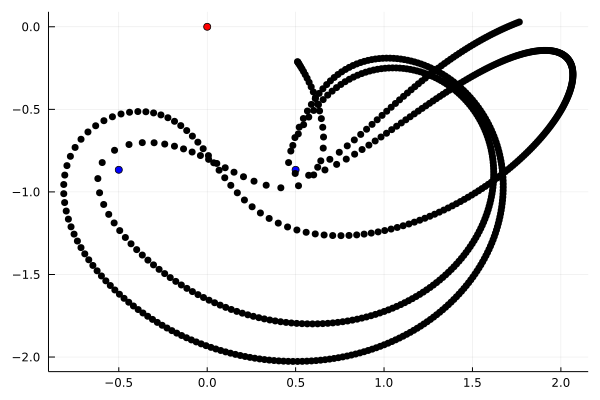

LoadError: [91mInterruptException:[39m

In [157]:
using Plots, ForwardDiff
r_proton = [0.0,0.0]
r_e1 = [-0.5,-sqrt(3)/2]
r_e2 = [0.5,-sqrt(3)/2]
#scatter(r_proton,color=:red, show=:ijulia)
#scatter!(r_e1,color=:blue,show=:ijulia)
#scatter!(r_e2,color=:blue,show=:ijulia)
scatter([r_proton[1]],[r_proton[2]],color=:red,show=:ijulia,label="")
scatter!([r_e1[1],r_e2[1]],[r_e1[2],r_e2[2]],color=:blue,show=:ijulia,label="")
#scatter!(r_e1[1],r_e1[2],color=:blue)
#scatter!(r_e2[1],r_e2[2],color=:blue)
k = 9e+9
m = 9.1e-31
q = 1.0 
U(x) = k*q*(1/sqrt((x[1]-r_proton[1])^2+(x[2]-r_proton[2])^2) - 
    1/sqrt((x[1]-r_e1[1])^2+(x[2]-r_e1[2])^2) - 
    1/sqrt((x[1]-r_e2[1])^2+(x[2]-r_e2[2])^2))
F(x) = (-1)*ForwardDiff.gradient(U,x)
## Positrón
r1 = [0.51,-0.21]
v1 = [0.0,0.0]
a1 = F(r1)/m

n = 1.5*1e+7
Δt = 5*1e-26
for i in 1:n
    r2 = r1 + v1*Δt
    v2 = v1 + a1*Δt
    a2 = F(r2)/m
    if i%5000 ==0
        #println(r2)
        scatter!([r2[1]],[r2[2]],color=:black,show=:ijulia, label="")
    end
    r1 = r2
    v1=v2
    a1=a2
end
    

## Integración

12. **Fácil**. Haz una función que calcule la integral de linea de una función 1D (usando la regla de Simpson y diferenciación automática o numérica) entre 2 valores de x. Esta debe tener como argumentos la función que se integrará y los límites de integración. 

Ahora, supón que quieres hacer un techo de lámina de esos que tienen onditas que mida $3m \times 2m$ y las onditas estén a lo largo del lado de $3m$. Las ondas siguien la función $f(x, y) = sin(x)$. ¿De qué dimensiones necesitas tu lámina inicial (antes de formar las onditas)? (por supuesto, necesitas integrar numéricamente, por simple que suena el problema, no se puede resolver analíticamente!!). 

In [158]:
function integral_simpson(f, a,b;n = 100)
    Δx = (b-a)/n
    sum([(f(x)+f(x+Δx)+4*f(x+Δx/2)) for x ∈ a:Δx:(b-Δx)].*Δx/6)
end

integral_simpson (generic function with 1 method)

In [159]:
f(x)=sqrt(1+(cos(x))^2)# FUNCION QUE DESCRIBE LAS LAMINAS
integral_simpson(f,0,2*pi)

7.640395578055425

13. **Dificultad media**. Generaliza la función de arriba a varias dimensiones. Es decir, se quiere calcular la integral $\int_C f(s) ds$, donde $f$ es una función que se evalua sobre una curva $C$, es decir $f:C \rightarrow \mathbb{R}$. Para esto requieres parametrizar $C$ con una función $\vec{r}(t)$. Esto implica que los argumentos de tu función serán $f$, $r$ y el intervalo de $t$. 

Utiliza esta función para calcular el trabajo (energía mínima) de mover una nave (de masa 1) de la tierra a la luna. Considera la influencia de la tierra, sol y luna y luego sólo considera la influencia de tierra y luna. Puedes pensarlo como si la nave se mueve a velocidad casi infinita (versión fácil: tierra, sol y luna no se mueven) o sofisticarlo y pensar que la luna se está moviendo con respecto al sol y la tierra (en cuyo caso sí importa la trayectoria que se siga). 

In [161]:
using  ForwardDiff

### F(x,y,z,...)
#### Posición Tierra
Mt = 5.972*1e+24
Ms = 1.989*1e+30
Ml = 7.349*1e+22
G = 6.67*1e-11
xt=[0,0]
xs = [1.5*1e+11,0]
xl = [0,3*1e+8]
U(x) = -G*(Mt/(sqrt((x[1]-xt[1])^2 + (x[2]-xt[2])^2)) + Ms/(sqrt((x[1]-xs[1])^2 + (x[2]-xs[2])^2)) + Ml/(sqrt((x[1]-xl[1])^2 + (x[2]-xl[2])^2)))
F(x) = (-1)*ForwardDiff.gradient(U,x)
### Sea Γ(t) la trayectoria recta que une a la tierra con la luna
Γx(t)=xt[1] + t*(xt[1]-xl[1])
Γy(t)=xt[2] + t*(xt[2]-xl[2])
Γ(t) = [Γx(t),Γy(t)]

#### Derivada de la trayectoria
dΓx(t)=ForwardDiff.derivative(Γx, t)
dΓy(t)=ForwardDiff.derivative(Γy, t)
dΓ(t)=[dΓx(t),dΓy(t)]

######Función a integrar
f_w(t) = F(Γ(t))[1]*dΓx(t) + F(Γ(t))[2]*dΓy(t)

### Trabajo realizado, por unidad de masa
Work = integral_simpson(f_w,6500/350000,1;n = 100)

-7.021536661599754e7

14. **Fácil**. Integrales múltiples: Generaliza la función de integración con el método de Simpson para que incluya funciones de varias variables (y varios intervalos). Prueba tu función con alguna integral que puedas resolver analíticamente (vía SymPy). 

In [162]:
ff(x)=log(x[1]^2 + x[2]^2)
fff(x)=x[1]^2 + x[2]^2 +x[3]^2 -1

fff (generic function with 1 method)

In [163]:
using SymPy
##### Generalización incompleta
function integral_simpson(f,a,b;n = 100)
    @vars x1 x2 x3 x4 x5 x6 x7 x8 x9 x10
    X=sympy.Matrix([x1 x2 x3 x4 x5 x6 x7 x8 x9 x10])
    dim = length(a)
    X = X[1:dim]
    Δx=[]
    for i in 1:dim
        push!(Δx,(b[i]-a[i])/n)
    end
    F=[]
    for i in 1:dim
        X1 = push!(X[1:dim-1],x)
        X2 = push!(X[1:dim-1],x+Δx)
        X3 = push!(X[1:dim-1],x+Δx/2)
        if i == 1
            push!(F,sum([(f(X1)+f(X2)+4*f(X3)) for x ∈ a[i]:Δx[i]:(b[i]-Δx[i])].*Δx[i]/6))
        else
            push!(F,sum([(F[i-1](X1)+F[i-1](X2)+4*F[i-1](X3)) for x ∈ a[i]:Δx[i]:(b[i]-Δx[i])].*Δx[i]/6))
        end
        X=X[1:end-1]
    end
    return F[end]
end

integral_simpson (generic function with 1 method)

In [164]:
##Regiones simples 2D
function integral_simpson2(f,a,b;n = 100)
    dim = length(a)
    Δx = (b[1]-a[1])/n
    Δy = (b[2]-a[2])/n
    fy(y)=sum([(f([x,y])+f([x+Δx,y])+4*f([x+Δx/2,y])) for x ∈ a[1]:Δx:(b[1]-Δx)].*Δx/6)
    return (sum([(fy(y)+fy(y+Δy)+4*fy(y+Δy/2)) for y ∈ a[2]:Δy:(b[2]-Δy)].*Δy/6))
end

integral_simpson2 (generic function with 1 method)

In [165]:
#### Regiones simples 3D
function integral_simpson3(f,a,b;n = 100)
    dim = length(a)
    Δx = (b[1]-a[1])/n
    Δy = (b[2]-a[2])/n
    Δz = (b[3]-a[3])/n
    fyz(y,z)=sum([(f([x,y,z])+f([x+Δx,y,z])+4*f([x+Δx/2,y,z])) for x ∈ a[1]:Δx:(b[1]-Δx)].*Δx/6)
    fz(z)=sum([(fyz(y,z)+fyz(y+Δy,z)+4*fyz(y+Δy/2,z)) for y ∈ a[2]:Δy:(b[2]-Δy)].*Δy/6)
    return (sum([(fz(z)+fz(z+Δz)+4*fz(z+Δz/2)) for z ∈ a[3]:Δz:(b[3]-Δz)].*Δz/6))
end

integral_simpson3 (generic function with 1 method)

In [166]:
#### Prueba 2D
integral_simpson2(ff,[1,1],[2,2])

1.5036650239269769

In [167]:
#### Prueba 3D
integral_simpson3(fff,[1,1,1],[2,2,2])

6.0

In [168]:
##### Esquema diferente Regla de Simpson, mismo resultado
#function integral_simpson(f,a,b;n = 100)
#    dim = length(a)
#    Δx = (b[1]-a[1])/n
#    Δy = (b[2]-a[2])/n
#    fy(y)= (f(a[1],y) + 4*sum([(f(x,y)) for x ∈ a[1]:2*Δx:b[1]]) +2*sum([(f(x,y)) for x ∈ a[1]+Δx:2*Δx:b[1]-2*Δx]))*Δx/3
#    return (fy(a[2]) + 4*sum([(fy(y)) for y ∈ a[2]:2*Δy:b[2]]) +2*sum([(fy(y)) for y ∈ a[2]+Δy:2*Δy:b[2]-2*Δy]))*Δy/3
#end

15. **Talachudo**. Haz los pasos (que no hice en el video) para obtener la fórmula del trapecio, de Simpson y ve a un grado más (cúbico). 

En el caso del grado cúbico ¿Hay alguna ventaja de elegir los puntos por los que pasa el polinomio equidistantes? si sí, ¿cuál?  

## Interpolación

16. **Dificultad media**. Un polinomio usualmente se escribe en la forma $a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n$, con $n+1$ coeficientes para un polinomio de grado $n$. Haz una función que dada una función $f$ y un vector $\vec{x}$ con $n+1$ elementos, calcule los coeficientes $a_i$ del polinomio de Lagrange que pasa por $(x_0, f(x_0)), (x_1, f(x_1)), \dots, (x_n, f(x_n))$. 

In [190]:
using SymPy;
using Plots;
@vars x

Px = [1,2,3,4,5]
h(w)=w+cos(2*w-w/w)
g(w)=3*w^3+w 
function Interpolate_Lagrange(Px,g;Plot=0)
    Py = g.(Px)
    A = []
    L(x,a)= x - a
    for j in 1:length(Px)
        Num = prod([L(x,Px[i]) for i in 1:length(Px) if i!=j])
        Deno = prod([L(Px[j],Px[i]) for i in 1:length(Px) if i!=j])
        push!(A,Py[j]*Num/Deno)
    end
    f(x)=simplify(sum(A)(x))
    #println(f(x))
    q=sympy.Poly(f(x),x)
    #println(q)
    z = minimum(Px):0.1:maximum(Px)
    if Plot==1
        plot(z,g.(z),label="Función original",show=:ijulia)
        plot!(z,f.(z),label = "Polinomio de interpolación")
        scatter!([Px],[Py],color=:red,label="")
    end
    return (q.all_coeffs())
end


Interpolate_Lagrange (generic function with 1 method)

In [191]:
CC = Interpolate_Lagrange(Px,g)

4-element Array{Sym,1}:
 3
 0
 1
 0

17. **Dificultad media**. Haz una función que dados los coeficientes de un polinomio de grado $n$, calcule los coeficientes de su integral (hay un coeficiente que será arbitrario y se puede poner en 1) (similar, se puede hacer una de su derivada). 

Con esta función y la función del ejercicio anterior, haz una función que dada una función $f$, un entero $n$ y dos reales $a$ y $b$, calcule primero el polinomio de Lagrange con puntos separados equidistantemente en el eje $x$, después el polinomio de Lagrange de la integral y finalmente evalue este polinomio en $b$ y le reste el polinomio evaluado en $a$. 

Compara (en tiempo de integración y en calidad) lo que obtengas con lo que se obtiene vía la regla de Simpson para un par de funciones no polinomiales.

In [192]:
function Integra_coef(a)
    b = []
    push!(b,1)
    for i in 1:length(a)
        push!(b,a[i]/(i))
    end
    return(b)
end
function Pol_coef(b)
    A=[]
    M(x,n)=x^n
    for i in 1:length(b)
        push!(A,M(x,i-1)*b[i])
    end
    return(sum(A))
end
function Integra_polinomio(a)
    return Pol_coef(Integra_coef(a))
end
function Integra_Lagrange(f,a,b,n)
    X = a:(b-a)/n:b
    Y = f.(X)
    CC = reverse(Interpolate_Lagrange(X,f))
    #println(CC)
    R = Integra_polinomio(CC)(X[end])-Integra_polinomio(CC)(X[1])
    return R
end   

Integra_Lagrange (generic function with 1 method)

In [193]:
f(x) = x^3+x^2+x

f (generic function with 1 method)

In [194]:
Integra_Lagrange(h,1,2,2)

1.14762041051318

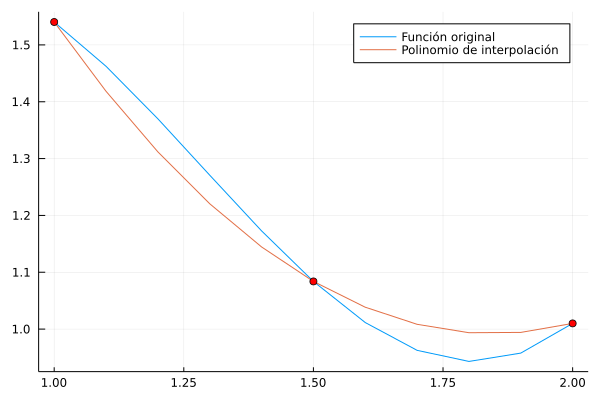

3-element Array{Sym,1}:
 0.765206964723958
 -2.82591569664046
  3.60101103778464

In [195]:
Interpolate_Lagrange(1:0.5:2,h,Plot=1)